In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
import zipfile
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,TimeDistributed
from keras.callbacks import TensorBoard
import math
from sklearn.metrics import mean_squared_error
from google.colab import files

In [2]:
files.upload()
! mkdir /root/.kaggle
! cp kaggle.json /root/.kaggle
! kaggle datasets download -d jainilcoder/netflix-stock-price-prediction

mkdir: cannot create directory ‘/root/.kaggle’: File exists
netflix-stock-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
for file in os.listdir():
    zip_ref = zipfile.ZipFile('/content/netflix-stock-price-prediction.zip', 'r')
    zip_ref.extractall()
    zip_ref.close()

In [4]:
df=pd.read_csv('/content/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


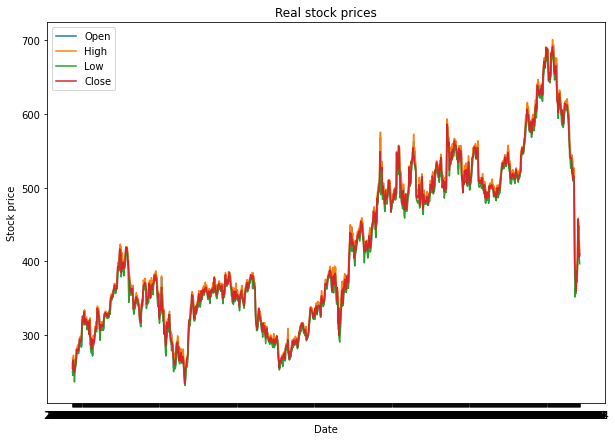

In [8]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(df['Date'],df['Open'])
ax.plot(df['Date'],df['High'])
ax.plot(df['Date'],df['Low'])
ax.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.title('Real stock prices')
plt.legend(['Open','High','Low','Close']);

In [9]:
train=np.array(df['Close'][:int(df.shape[0]*.8)])
test=np.array(df['Close'][int(df.shape[0]*.8):])

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
train=mms.fit_transform(train.reshape(-1,1))

In [11]:
# We will use the data to predict the price after 10 days.
x_train=train[:-10]
y_train=train[10:]
x_test=test[:-10]
y_test=test[10:]

In [12]:
len(x_train),len(y_train),len(x_test),len(y_test)

(797, 797, 192, 192)

In [13]:
model=Sequential()
model.add(LSTM(units=20,return_sequences=True,input_shape=(None,1)))
model.add(Dropout(.2))
model.add(LSTM(units=15))
model.add(Dropout(.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 20)          1760      
                                                                 
 dropout (Dropout)           (None, None, 20)          0         
                                                                 
 lstm_1 (LSTM)               (None, 15)                2160      
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 3,936
Trainable params: 3,936
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
history=model.fit(x_train,y_train,epochs=100,batch_size=20)

Epoch 1/100
40/40 [==============================] - 5s 4ms/step - loss: 0.2024
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1083
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0341
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0246
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0193
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 11/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 12/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 13/100
40/40 [=================

In [16]:
inputs=mms.transform(x_test.reshape(-1,1))
stock_predict=mms.inverse_transform(model.predict(inputs))

In [17]:

stock_predict=np.reshape(stock_predict,(-1,1))
rmse=math.sqrt(mean_squared_error(y_test,stock_predict))
print('Root Mean Square Error = ',rmse)

Root Mean Square Error =  43.9005160685789


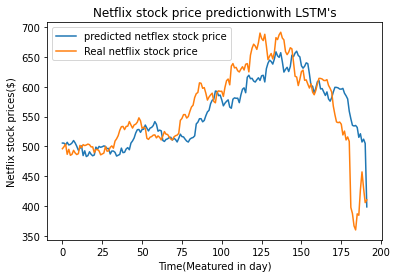

In [18]:
plt.plot(stock_predict,label='predicted netflex stock price',linewidth=1.5)
plt.plot(y_test,label='Real netflix stock price',linewidth=1.5)
plt.title("Netflix stock price predictionwith LSTM's")
plt.xlabel('Time(Meatured in day)')
plt.ylabel("Netflix stock prices($)")
plt.legend()
plt.show()